In [1]:
#Imports
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools
import networkx.algorithms.community as nx_comm
from itertools import combinations
from community import community_louvain
from matplotlib.cm import ScalarMappable
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import pdist, squareform
from networkx.algorithms import community

In [3]:
#Set-up - reading the data file, initializing a graph
G = nx.Graph()
df = pd.read_csv('nba2021-2022.csv')
df.columns = df.columns.str.strip()

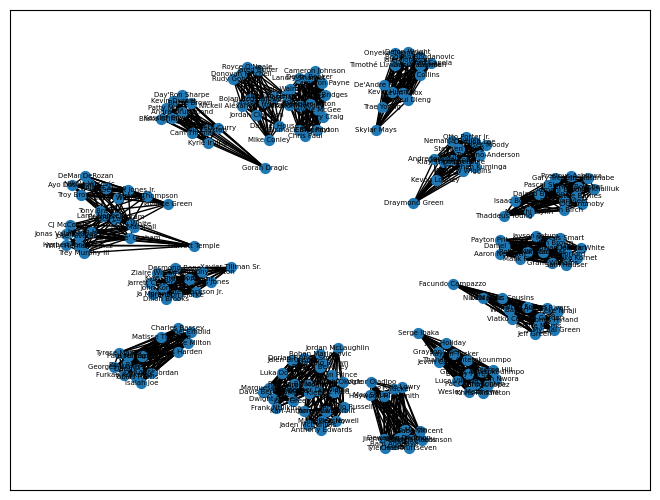

# Nodes: 217
# Edges: 1373
# Connected Components: 16
Top 5 clustering coefficients: [('Precious Achiuwa', 1.0), ('OG Anunoby', 1.0), ('Dalano Banton', 1.0), ('Scottie Barnes', 1.0), ('Khem Birch', 1.0)]
Max Diameter of a Component in Graph: 1


In [4]:
# Basic Graph: players on the same team are connected via an edge.
# Only spring visualization to showcase teams efficiently.
G.clear()

# Loop through each team in the dataframe
for team in df['Tm']:
    # Filter the dataframe for the current team
    df_team = df[df['Tm'] == team]

    # Add nodes for each player in the team
    for player in df_team['Player'].unique():
        G.add_node(player)

    # Create edges between players on the same team
    team_players = df_team['Player'].unique()
    for i in range(len(team_players)):
        for j in range(i + 1, len(team_players)):
            G.add_edge(team_players[i], team_players[j])

# Generate layout positions for the nodes using the spring layout algorithm
pos = nx.spring_layout(G, k=0.15, iterations=20)

# Draw the graph with labels and specified node size and font size
nx.draw(G, pos, with_labels=True, node_size=50, font_size=5)

# Display the graph
plt.axis('on')
plt.show()

# Print various graph statistics
print("# Nodes:", G.number_of_nodes())
print("# Edges:", G.number_of_edges())
print("# Connected Components:", nx.number_connected_components(G))

# Calculate clustering coefficients for each node
clusters = nx.clustering(G)
highest = sorted(clusters.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 clustering coefficients:", highest)

# Calculate the connected components and their diameters
total_connected_components = nx.connected_components(G)
diameter = []
for component in total_connected_components:
    subgraph = G.subgraph(component)
    diameter_curr = nx.diameter(subgraph)
    diameter.append(diameter_curr)

# Find the maximum diameter among the connected components
max_diameter = max(diameter)
print("Max Diameter of a Component in Graph:", max_diameter)


<ipython-input-5-1938dfe1cd10>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['points_per_minute'] = df['PTS'] / df['MP']


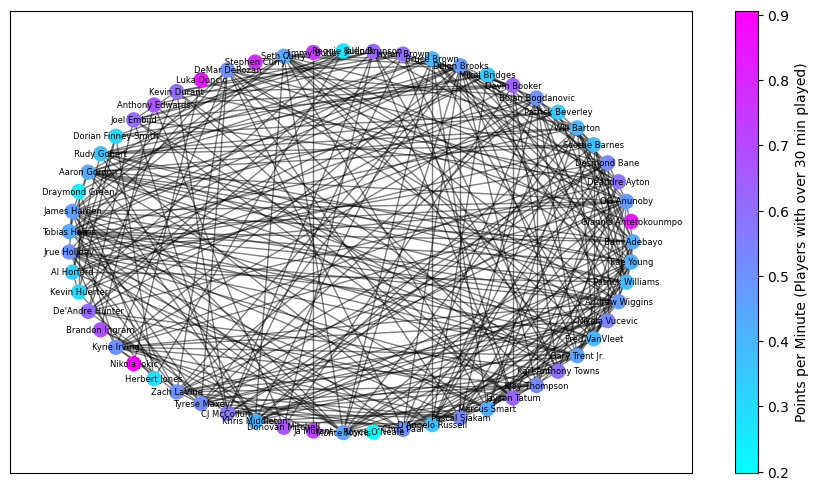

In [5]:
# Graph 1: Node weighted graph for points per game
G.clear()

# Filter the dataframe for players who played over 30 minutes
df = df[df['MP'] > 30]

# Calculate points per minute for each player
df['points_per_minute'] = df['PTS'] / df['MP']

# Add nodes to the graph with player names as labels and points per minute as node attribute
for i, row in df.iterrows():
    player = row['Player']
    ppm = row['points_per_minute']
    G.add_node(player, color=ppm)

# Add edges between nodes if the absolute difference in points per minute is less than 0.05
for u in G.nodes():
    for v in G.nodes():
        if u != v and abs(G.nodes[u]['color'] - G.nodes[v]['color']) < 0.05:
            G.add_edge(u, v)

# Generate circular layout positions for the nodes
pos = nx.circular_layout(G)

# Set up the figure for plotting
plt.figure(figsize=(11, 6))

# Create a list of node colors based on the points per minute attribute
node_colors = [data['color'] for _, data in G.nodes(data=True)]
cmap = cm.cool
norm = plt.Normalize(min(node_colors), max(node_colors))
node_colors = [cmap(norm(color)) for color in node_colors]

# Draw nodes with colors, edges, and labels
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=100)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=6)

# Create a colorbar for the points per minute values
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Points per Minute (Players with over 30 min played)', ax=plt.gca())

plt.axis('on')
plt.show()


# Nodes: 59
# Edges: 313
# Connected Components: 3
Top 5 clustering coefficients: [('Draymond Green', 1.0), ('Deandre Ayton', 0.9444444444444444), ('Jaylen Brown', 0.9444444444444444), ('Kevin Durant', 0.9444444444444444), ('Joel Embiid', 0.9444444444444444)]
Max Diameter of a Component in Graph: 13


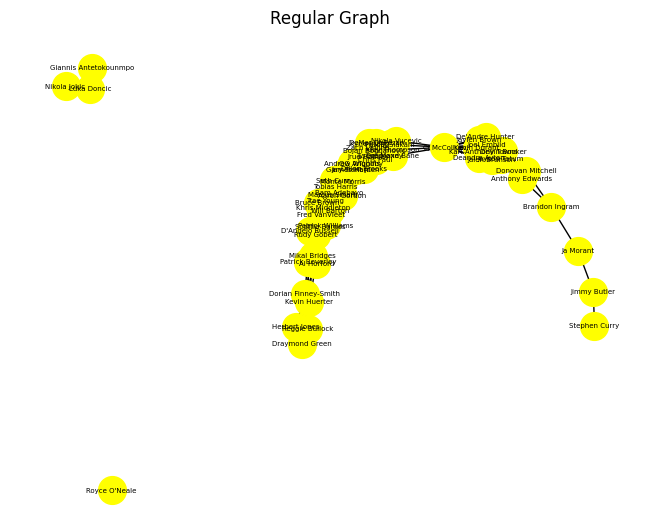

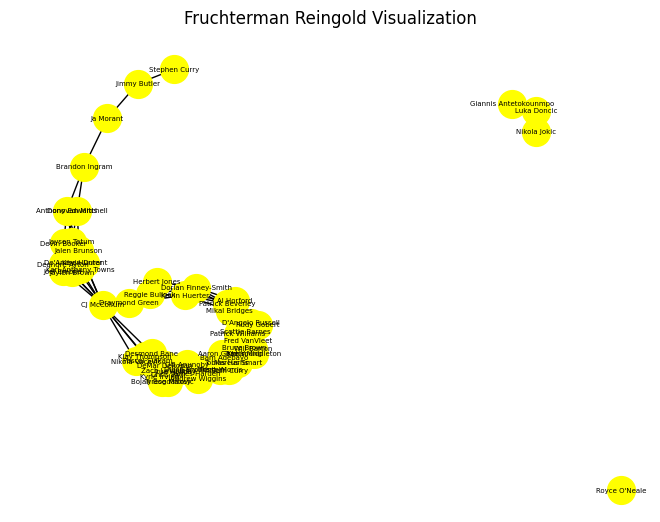

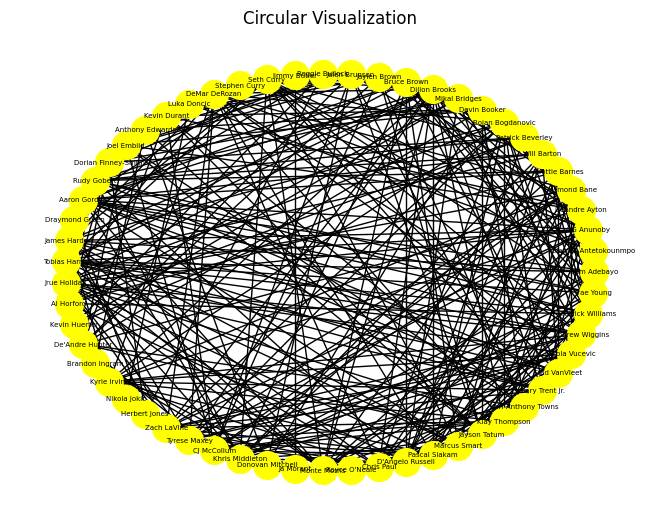

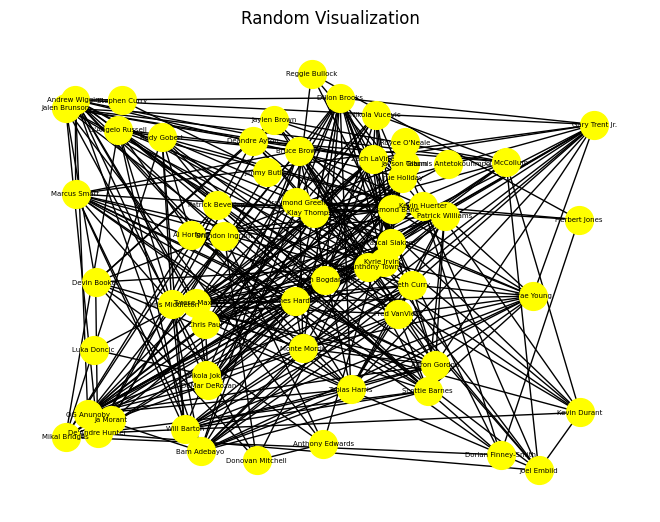

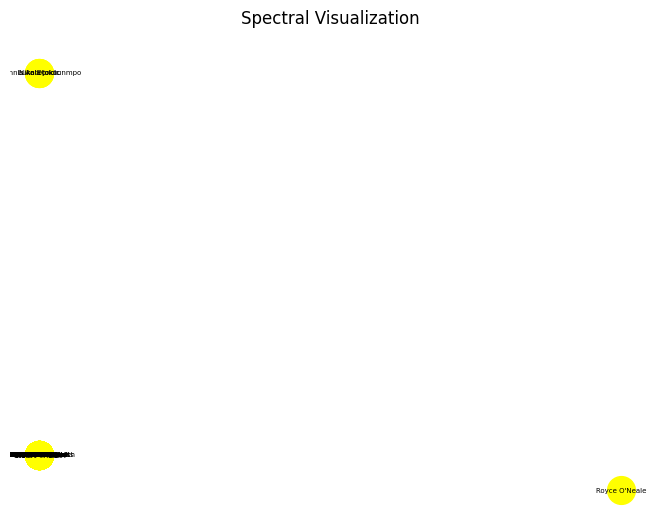

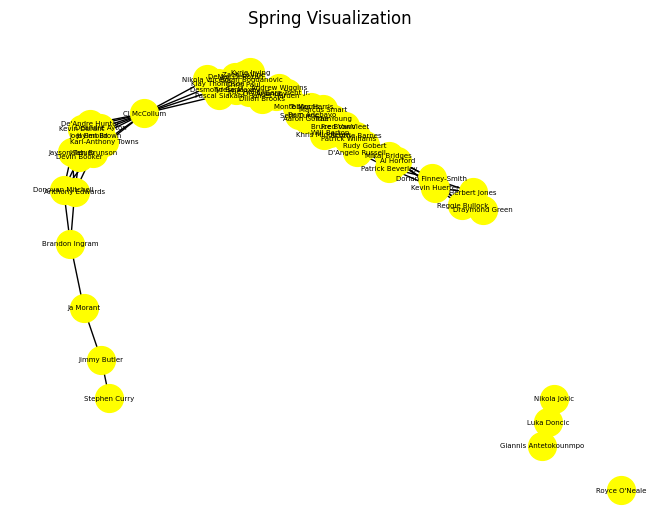

Top 5 nodes for Degree centrality: ['OG Anunoby', 'Dillon Brooks', 'Bam Adebayo', 'Aaron Gordon', 'James Harden']
Top 5 nodes for Closeness centrality: ['OG Anunoby', 'Dillon Brooks', 'Bam Adebayo', 'Desmond Bane', 'Aaron Gordon']
Top 5 nodes for betweeness centrality: ['CJ McCollum', 'Jalen Brunson', 'OG Anunoby', 'Dillon Brooks', 'Desmond Bane']
Top 5 nodes for eigenvector centrality: ['OG Anunoby', 'Dillon Brooks', 'James Harden', 'Andrew Wiggins', 'Gary Trent Jr.']
Top 5 nodes for centralities katz centrality: ['OG Anunoby', 'Dillon Brooks', 'James Harden', 'Andrew Wiggins', 'Bam Adebayo']


In [ ]:
# Print number of nodes and edges in the graph
print("# Nodes:", G.number_of_nodes())
print("# Edges:", G.number_of_edges())

# Count the number of connected components in the graph
print("# Connected Components:", nx.number_connected_components(G))

# Calculate the clustering coefficients for each node in the graph
clusters = nx.clustering(G)

# Get the top 5 nodes with the highest clustering coefficients
highest = sorted(clusters.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 clustering coefficients:", highest)

# Find the connected components in the graph
total_connected_components = nx.connected_components(G)

# Calculate the diameter of each connected component and store them in a list
diameter = []
for component in total_connected_components:
    subgraph = G.subgraph(component)
    diameter_curr = nx.diameter(subgraph)
    diameter.append(diameter_curr)

# Find the maximum diameter among the connected components
max_diameter = max(diameter)
print("Max Diameter of a Component in Graph:", max_diameter)

# Draw the graph with node labels using the default layout
nx.draw(G, with_labels=True, node_size=400, font_weight='normal', font_size=5, node_color='yellow')
plt.title("Regular Graph")
plt.show()

# Draw the graph with node labels using the Fruchterman-Reingold layout
nx.draw(G, with_labels=True, node_size=400, node_color="yellow", font_size=5, pos=nx.fruchterman_reingold_layout(G))
plt.title("Fruchterman Reingold Visualization")
plt.show()

# Draw the graph with node labels using the circular layout
nx.draw(G, with_labels=True, node_size=400, node_color="yellow", font_size=5, pos=nx.circular_layout(G))
plt.title("Circular Visualization")
plt.show()

# Draw the graph with node labels using the random layout
nx.draw(G, with_labels=True, node_size=400, node_color="yellow", font_size=5, pos=nx.random_layout(G))
plt.title("Random Visualization")
plt.show()

# Draw the graph with node labels using the spectral layout
nx.draw(G, with_labels=True, node_size=400, node_color="yellow", font_size=5, pos=nx.spectral_layout(G))
plt.title("Spectral Visualization")
plt.show()

# Draw the graph with node labels using the spring layout
nx.draw(G, with_labels=True, node_size=400, node_color="yellow", font_size=5, pos=nx.spring_layout(G))
plt.title("Spring Visualization")
plt.show()




# Calculate and print the top 5 nodes based on degree centrality
highest = sorted(nx.degree_centrality(G), key=nx.degree_centrality(G).get, reverse=True)[:5]
print("Top 5 nodes for Degree centrality:", highest)

# Calculate and print the top 5 nodes based on closeness centrality
highest = sorted(nx.closeness_centrality(G), key=nx.closeness_centrality(G).get, reverse=True)[:5]
print("Top 5 nodes for Closeness centrality:", highest)

# Calculate and print the top 5 nodes based on betweenness centrality
highest = sorted(nx.betweenness_centrality(G), key=nx.betweenness_centrality(G).get, reverse=True)[:5]
print("Top 5 nodes for betweeness centrality:", highest)

# Calculate and print the top 5 nodes based on eigenvector centrality
highest = sorted(nx.eigenvector_centrality(G), key=nx.eigenvector_centrality(G).get, reverse=True)[:5]
print("Top 5 nodes for eigenvector centrality:", highest)

# Calculate and print the top 5 nodes based on Katz centrality
katz = nx.katz_centrality(G, alpha=0.01)
highest = sorted(katz, key=katz.get, reverse=True)[:5]
print("Top 5 nodes for centralities katz centrality:", highest)

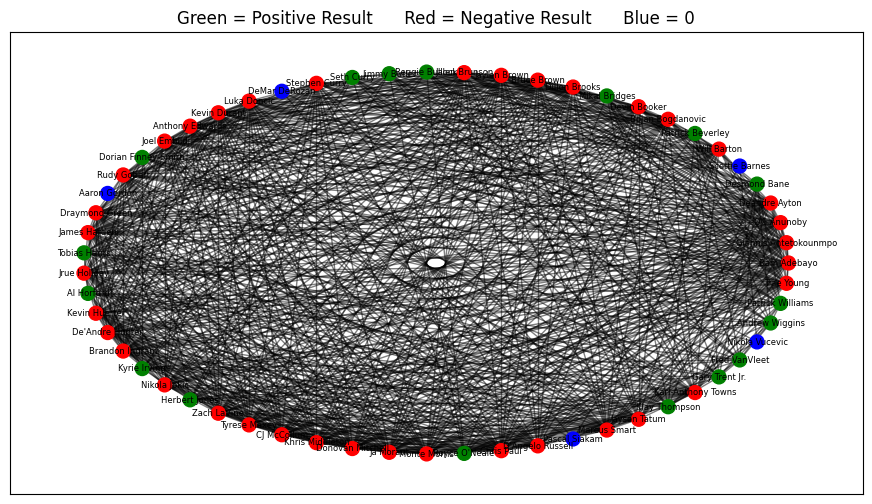

In [ ]:
# Graph 2: [(blocked shots + steals) - turnovers] node weighted graph
G.clear()

# Filter the dataframe for players who played over 30 minutes
df = df[df['MP'] > 30]

# Calculate the stats per minute based on the formula [(blocked shots + steals) - turnovers] / minutes played
df['stats_per_min'] = (df['BLK'] + df['STL'] - df['TOV']) / df['MP']

# Initialize a variable to track the difference
diff = 0

# Function to determine the category based on the comparison with the difference
def section(spm, diff):
    if spm > diff:
        return 'Pos'
    elif spm == diff:
        return 'Zero'
    else:
        return 'Neg'

# Iterate over each row in the dataframe
for i, row in df.iterrows():
    player = row['Player']
    spm = row['stats_per_min']

    # Determine the category for the player based on the stats per minute and the difference
    category = section(spm, diff)

    # Add a node for the player with the corresponding category
    G.add_node(player, category=category)

# Assign colors to the nodes based on their categories
color = ['green' if data['category'] == 'Pos' else 'blue' if data['category'] == 'Zero' else 'red' for _, data in G.nodes(data=True)]

# Create edges between nodes that belong to the same category
for u in G.nodes():
    for v in G.nodes():
        if u != v and G.nodes[u]['category'] == G.nodes[v]['category']:
            G.add_edge(u, v)

# Draw the graph with circular layout and color-coded nodes
plt.figure(figsize=(11, 6))
nx.draw_networkx_nodes(G, pos=nx.circular_layout(G), node_color=color, node_size=100)
nx.draw_networkx_edges(G, pos=nx.circular_layout(G), alpha=0.5)
nx.draw_networkx_labels(G, pos=nx.circular_layout(G), font_size=6)

# Set the title and display the graph
plt.title("Green = Positive Result      Red = Negative Result      Blue = 0")
plt.axis('on')
plt.show()


# Nodes: 59
# Edges: 812
# Connected Components: 3
Top 5 clustering coefficients: [('Bam Adebayo', 1.0), ('Giannis Antetokounmpo', 1.0), ('OG Anunoby', 1.0), ('Deandre Ayton', 1.0), ('Desmond Bane', 1.0)]
Max Diameter of a Component in Graph: 1


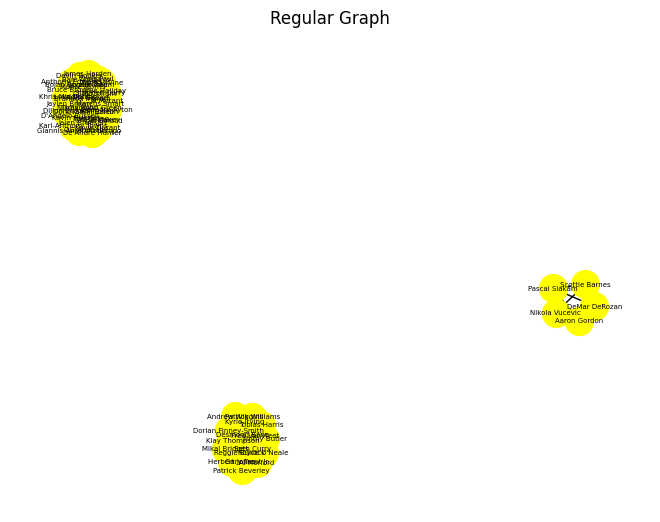

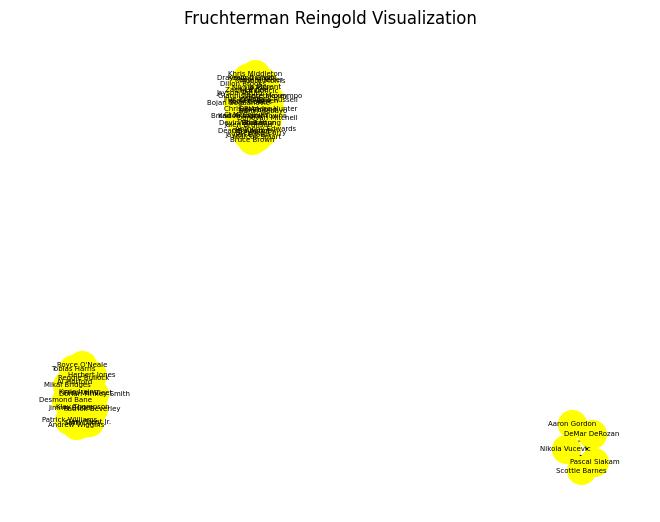

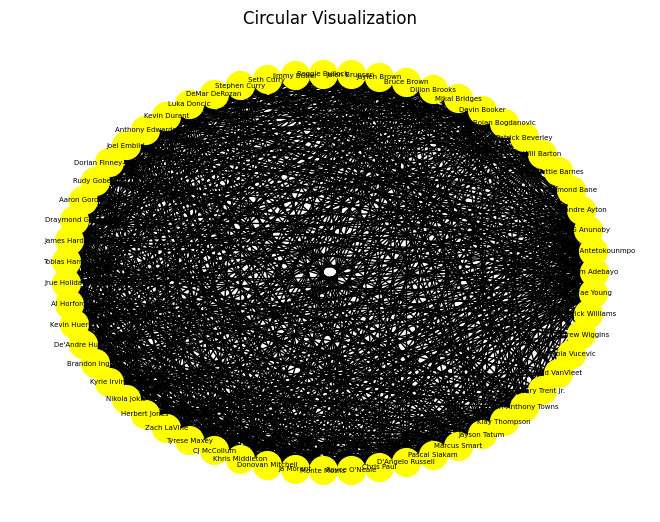

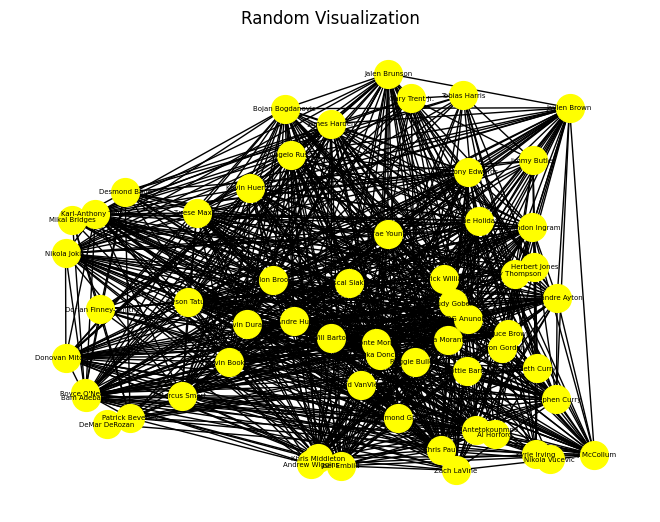

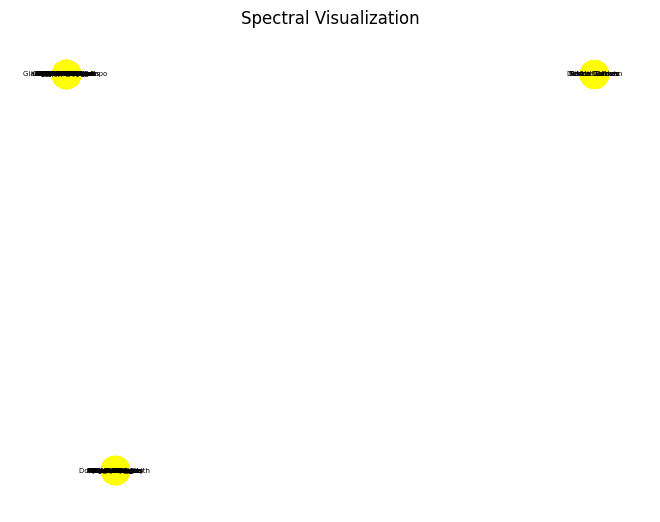

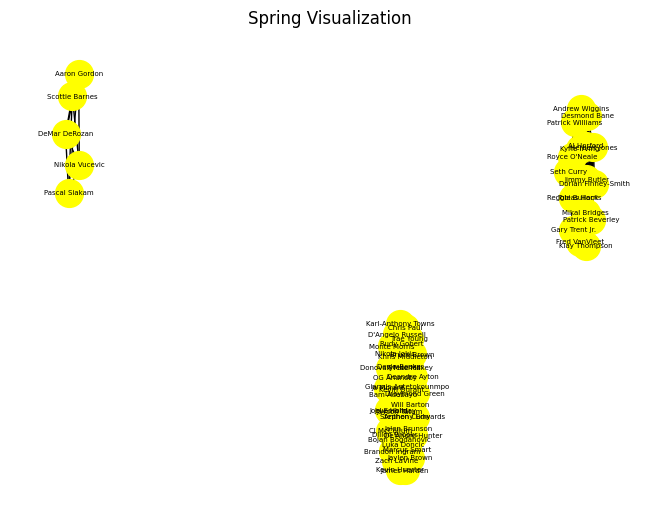

Top 5 nodes for Degree centrality: ['Bam Adebayo', 'Giannis Antetokounmpo', 'OG Anunoby', 'Deandre Ayton', 'Will Barton']
Top 5 nodes for Closeness centrality: ['Bam Adebayo', 'Giannis Antetokounmpo', 'OG Anunoby', 'Deandre Ayton', 'Will Barton']
Top 5 nodes for betweeness centrality: ['Bam Adebayo', 'Giannis Antetokounmpo', 'OG Anunoby', 'Deandre Ayton', 'Desmond Bane']
Top 5 nodes for eigenvector centrality: ['Bam Adebayo', 'Giannis Antetokounmpo', 'OG Anunoby', 'Deandre Ayton', 'Will Barton']
Top 5 nodes for centralities katz centrality: ['Bam Adebayo', 'Giannis Antetokounmpo', 'OG Anunoby', 'Deandre Ayton', 'Will Barton']


In [ ]:
# Print number of nodes and edges in the graph
print("# Nodes:", G.number_of_nodes())
print("# Edges:", G.number_of_edges())

# Count the number of connected components in the graph
print("# Connected Components:", nx.number_connected_components(G))

# Calculate the clustering coefficients for each node in the graph
clusters = nx.clustering(G)

# Get the top 5 nodes with the highest clustering coefficients
highest = sorted(clusters.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 clustering coefficients:", highest)

# Find the connected components in the graph
total_connected_components = nx.connected_components(G)

# Calculate the diameter of each connected component and store them in a list
diameter = []
for component in total_connected_components:
    subgraph = G.subgraph(component)
    diameter_curr = nx.diameter(subgraph)
    diameter.append(diameter_curr)

# Find the maximum diameter among the connected components
max_diameter = max(diameter)
print("Max Diameter of a Component in Graph:", max_diameter)

# Draw the graph with node labels using the default layout
nx.draw(G, with_labels=True, node_size=400, font_weight='normal', font_size=5, node_color='yellow')
plt.title("Regular Graph")
plt.show()

# Draw the graph with node labels using the Fruchterman-Reingold layout
nx.draw(G, with_labels=True, node_size=400, node_color="yellow", font_size=5, pos=nx.fruchterman_reingold_layout(G))
plt.title("Fruchterman Reingold Visualization")
plt.show()

# Draw the graph with node labels using the circular layout
nx.draw(G, with_labels=True, node_size=400, node_color="yellow", font_size=5, pos=nx.circular_layout(G))
plt.title("Circular Visualization")
plt.show()

# Draw the graph with node labels using the random layout
nx.draw(G, with_labels=True, node_size=400, node_color="yellow", font_size=5, pos=nx.random_layout(G))
plt.title("Random Visualization")
plt.show()

# Draw the graph with node labels using the spectral layout
nx.draw(G, with_labels=True, node_size=400, node_color="yellow", font_size=5, pos=nx.spectral_layout(G))
plt.title("Spectral Visualization")
plt.show()

# Draw the graph with node labels using the spring layout
nx.draw(G, with_labels=True, node_size=400, node_color="yellow", font_size=5, pos=nx.spring_layout(G))
plt.title("Spring Visualization")
plt.show()




# Calculate and print the top 5 nodes based on degree centrality
highest = sorted(nx.degree_centrality(G), key=nx.degree_centrality(G).get, reverse=True)[:5]
print("Top 5 nodes for Degree centrality:", highest)

# Calculate and print the top 5 nodes based on closeness centrality
highest = sorted(nx.closeness_centrality(G), key=nx.closeness_centrality(G).get, reverse=True)[:5]
print("Top 5 nodes for Closeness centrality:", highest)

# Calculate and print the top 5 nodes based on betweenness centrality
highest = sorted(nx.betweenness_centrality(G), key=nx.betweenness_centrality(G).get, reverse=True)[:5]
print("Top 5 nodes for betweeness centrality:", highest)

# Calculate and print the top 5 nodes based on eigenvector centrality
highest = sorted(nx.eigenvector_centrality(G), key=nx.eigenvector_centrality(G).get, reverse=True)[:5]
print("Top 5 nodes for eigenvector centrality:", highest)

# Calculate and print the top 5 nodes based on Katz centrality
katz = nx.katz_centrality(G, alpha=0.01)
highest = sorted(katz, key=katz.get, reverse=True)[:5]
print("Top 5 nodes for centralities katz centrality:", highest)

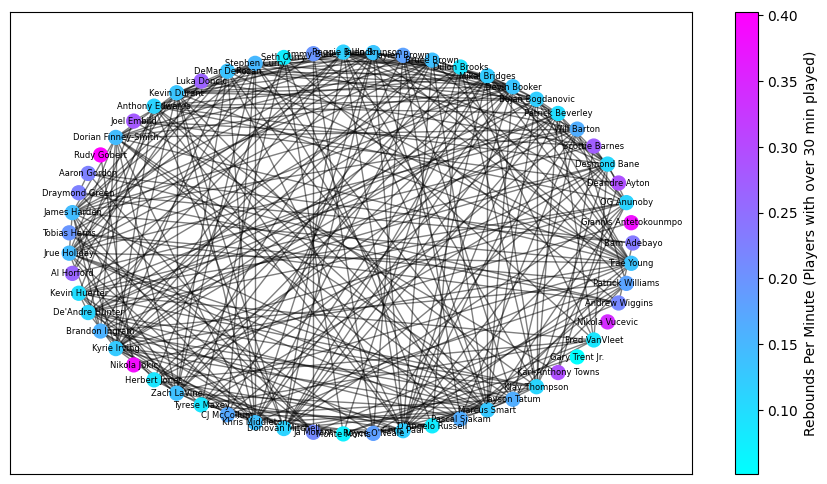

In [ ]:
#Graph 3: (offensive rebounds + defensive rebounds)/minute as weighted nodes
# Clear the graph
G.clear()

# Filter the dataframe to include players with more than 30 minutes played
df = df[df['MP'] > 30]

# Calculate rebounds per minute for each player
df['rebounds_per_min'] = (df['ORB'] + df['DRB']) / df['MP']

# Add nodes to the graph with rebound per minute as the color attribute
for i, row in df.iterrows():
    player = row['Player']
    rpm = row['rebounds_per_min']
    G.add_node(player, color=rpm)

# Add edges between nodes if the absolute difference in color values is less than 0.02
for u in G.nodes():
    for v in G.nodes():
        if u != v and abs(G.nodes[u]['color'] - G.nodes[v]['color']) < 0.02:
            G.add_edge(u, v)

# Set the position of nodes using a circular layout
pos = nx.circular_layout(G)

# Create a figure with a specified size
plt.figure(figsize=(11, 6))

# Get the node colors from the color attribute of nodes
node_colors = [data['color'] for _, data in G.nodes(data=True)]

# Create a colormap and normalize the color values
cmap = cm.cool
norm = plt.Normalize(min(node_colors), max(node_colors))

# Map the normalized colors to the colormap
node_colors = [cmap(norm(color)) for color in node_colors]

# Draw the nodes with the specified positions, colors, and size
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=100)

# Draw the edges with the specified positions and transparency
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Draw the labels of the nodes with a specified font size
nx.draw_networkx_labels(G, pos, font_size=6)

# Create a colorbar and set the label
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Rebounds Per Minute (Players with over 30 min played)', ax=plt.gca())

# Show the axes
plt.axis('on')

# Display the plot
plt.show()


# Nodes: 59
# Edges: 307
# Connected Components: 4
Top 5 clustering coefficients: [('Bam Adebayo', 1.0), ('Deandre Ayton', 1.0), ('Seth Curry', 1.0), ('Luka Doncic', 1.0), ('Al Horford', 1.0)]
Max Diameter of a Component in Graph: 10


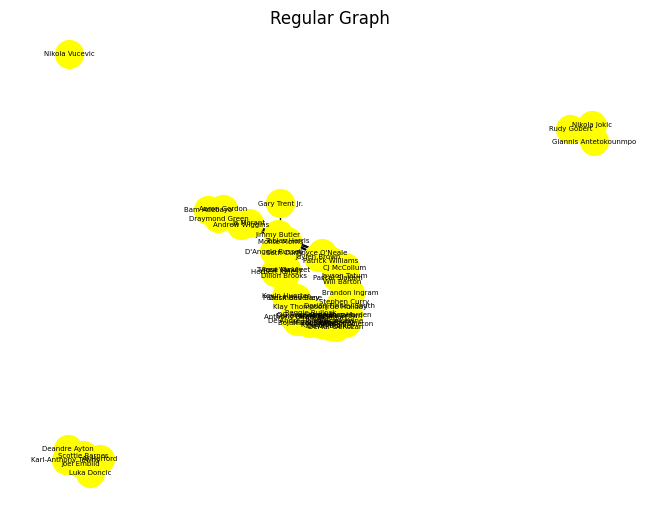

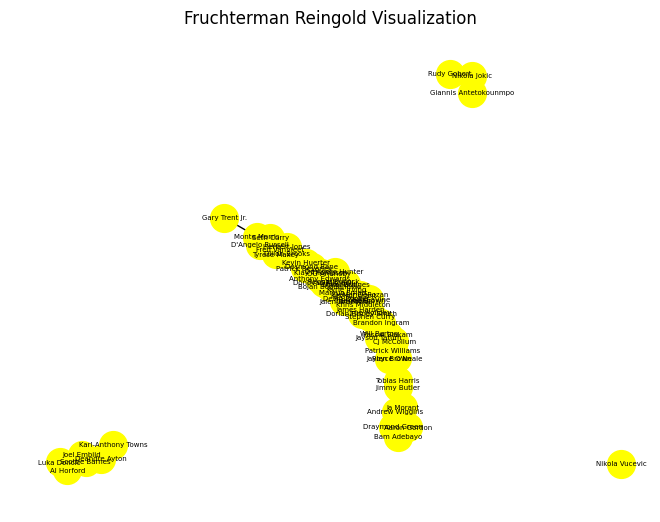

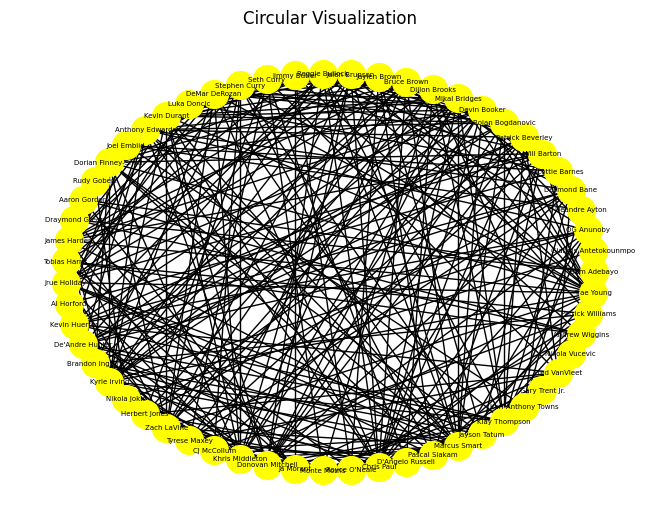

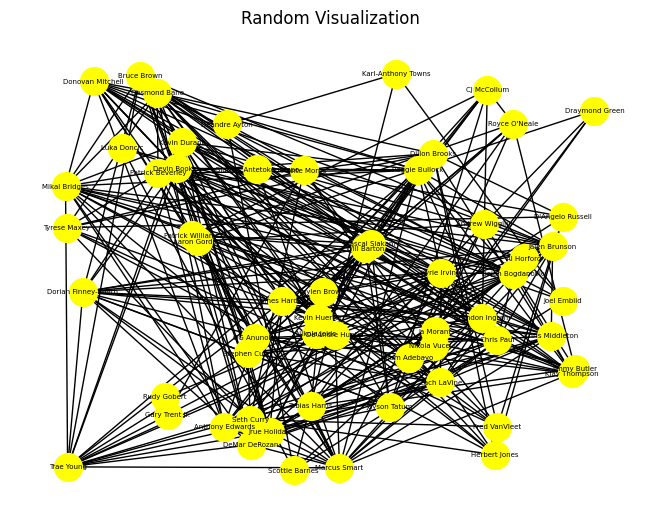

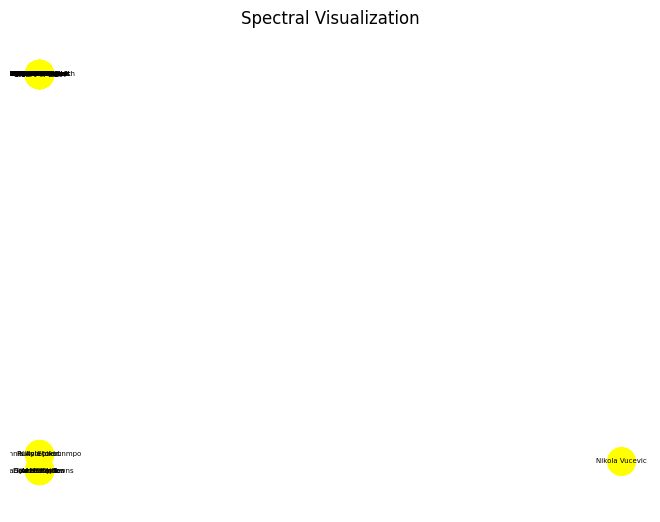

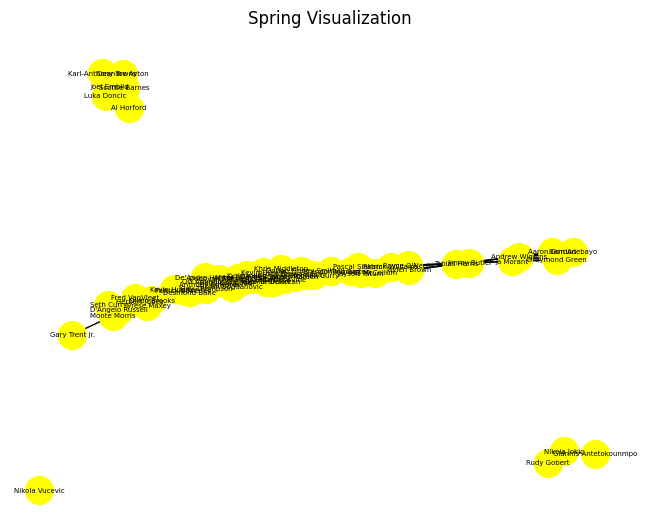

Top 5 nodes for Degree centrality: ['Marcus Smart', 'Kyrie Irving', 'Mikal Bridges', 'Chris Paul', 'Devin Booker']
Top 5 nodes for Closeness centrality: ['Marcus Smart', 'Kyrie Irving', 'Bruce Brown', 'Zach LaVine', 'Dorian Finney-Smith']
Top 5 nodes for betweeness centrality: ['Tobias Harris', 'Patrick Williams', 'Brandon Ingram', 'Dorian Finney-Smith', 'Marcus Smart']
Top 5 nodes for eigenvector centrality: ['Marcus Smart', 'Kyrie Irving', 'Devin Booker', 'Jalen Brunson', 'Kevin Durant']
Top 5 nodes for centralities katz centrality: ['Marcus Smart', 'Kyrie Irving', 'Mikal Bridges', 'Chris Paul', 'Devin Booker']


In [ ]:
# Print number of nodes and edges in the graph
print("# Nodes:", G.number_of_nodes())
print("# Edges:", G.number_of_edges())

# Count the number of connected components in the graph
print("# Connected Components:", nx.number_connected_components(G))

# Calculate the clustering coefficients for each node in the graph
clusters = nx.clustering(G)

# Get the top 5 nodes with the highest clustering coefficients
highest = sorted(clusters.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 clustering coefficients:", highest)

# Find the connected components in the graph
total_connected_components = nx.connected_components(G)

# Calculate the diameter of each connected component and store them in a list
diameter = []
for component in total_connected_components:
    subgraph = G.subgraph(component)
    diameter_curr = nx.diameter(subgraph)
    diameter.append(diameter_curr)

# Find the maximum diameter among the connected components
max_diameter = max(diameter)
print("Max Diameter of a Component in Graph:", max_diameter)

# Draw the graph with node labels using the default layout
nx.draw(G, with_labels=True, node_size=400, font_weight='normal', font_size=5, node_color='yellow')
plt.title("Regular Graph")
plt.show()

# Draw the graph with node labels using the Fruchterman-Reingold layout
nx.draw(G, with_labels=True, node_size=400, node_color="yellow", font_size=5, pos=nx.fruchterman_reingold_layout(G))
plt.title("Fruchterman Reingold Visualization")
plt.show()

# Draw the graph with node labels using the circular layout
nx.draw(G, with_labels=True, node_size=400, node_color="yellow", font_size=5, pos=nx.circular_layout(G))
plt.title("Circular Visualization")
plt.show()

# Draw the graph with node labels using the random layout
nx.draw(G, with_labels=True, node_size=400, node_color="yellow", font_size=5, pos=nx.random_layout(G))
plt.title("Random Visualization")
plt.show()

# Draw the graph with node labels using the spectral layout
nx.draw(G, with_labels=True, node_size=400, node_color="yellow", font_size=5, pos=nx.spectral_layout(G))
plt.title("Spectral Visualization")
plt.show()

# Draw the graph with node labels using the spring layout
nx.draw(G, with_labels=True, node_size=400, node_color="yellow", font_size=5, pos=nx.spring_layout(G))
plt.title("Spring Visualization")
plt.show()




# Calculate and print the top 5 nodes based on degree centrality
highest = sorted(nx.degree_centrality(G), key=nx.degree_centrality(G).get, reverse=True)[:5]
print("Top 5 nodes for Degree centrality:", highest)

# Calculate and print the top 5 nodes based on closeness centrality
highest = sorted(nx.closeness_centrality(G), key=nx.closeness_centrality(G).get, reverse=True)[:5]
print("Top 5 nodes for Closeness centrality:", highest)

# Calculate and print the top 5 nodes based on betweenness centrality
highest = sorted(nx.betweenness_centrality(G), key=nx.betweenness_centrality(G).get, reverse=True)[:5]
print("Top 5 nodes for betweeness centrality:", highest)

# Calculate and print the top 5 nodes based on eigenvector centrality
highest = sorted(nx.eigenvector_centrality(G), key=nx.eigenvector_centrality(G).get, reverse=True)[:5]
print("Top 5 nodes for eigenvector centrality:", highest)

# Calculate and print the top 5 nodes based on Katz centrality
katz = nx.katz_centrality(G, alpha=0.01)
highest = sorted(katz, key=katz.get, reverse=True)[:5]
print("Top 5 nodes for centralities katz centrality:", highest)

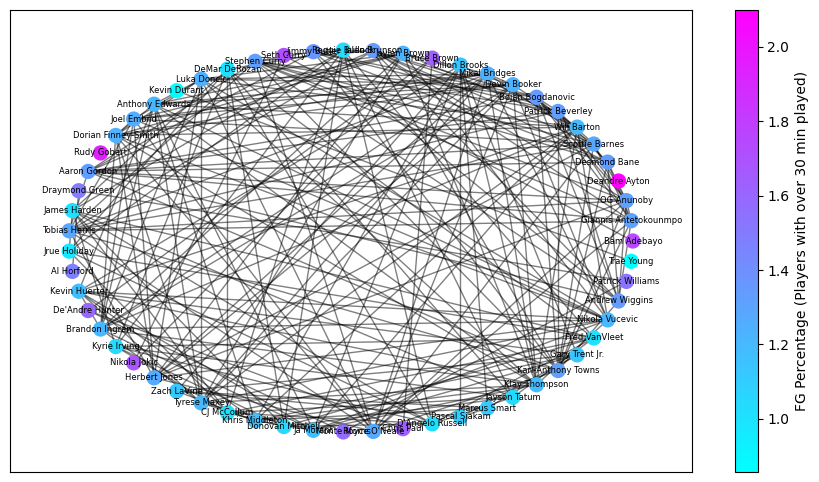

In [ ]:
#Graph 4: field goal percentages/minutes played for players as weighted nodes
G.clear()

# Filter the dataframe to include players with more than 30 minutes played
df = df[df['MP'] > 30]

# Calculate the field goal percentage per minute for each player
df['fg_perc'] = (df['FG%'] * 100) / df['MP']

# Iterate over the rows of the filtered dataframe
for i, row in df.iterrows():
    player = row['Player']
    ppm = row['fg_perc']
    G.add_node(player, color=ppm)

# Create edges between nodes if the absolute difference in color (fg_perc) is less than 0.05
for u in G.nodes():
    for v in G.nodes():
        if u != v and abs(G.nodes[u]['color'] - G.nodes[v]['color']) < 0.05:
            G.add_edge(u, v)

# Set the layout for the graph visualization
pos = nx.circular_layout(G)

# Create a figure for the graph visualization
plt.figure(figsize=(11, 6))

# Assign node colors based on the 'color' attribute (fg_perc) of nodes
node_colors = [data['color'] for _, data in G.nodes(data=True)]

# Create a colormap for the node colors
cmap = cm.cool
norm = plt.Normalize(min(node_colors), max(node_colors))
node_colors = [cmap(norm(color)) for color in node_colors]

# Draw the nodes, edges, and labels of the graph
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=100)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=6)

# Create a colorbar for the node colors
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='FG Percentage (Players with over 30 min played)', ax=plt.gca())

# Show the axes
plt.axis('on')
# Show plot
plt.show()


# Nodes: 59
# Edges: 247
# Connected Components: 6
Top 5 clustering coefficients: [('Jimmy Butler', 1.0), ('Jrue Holiday', 1.0), ('Kyrie Irving', 1.0), ('Donovan Mitchell', 1.0), ('Chris Paul', 1.0)]
Max Diameter of a Component in Graph: 8


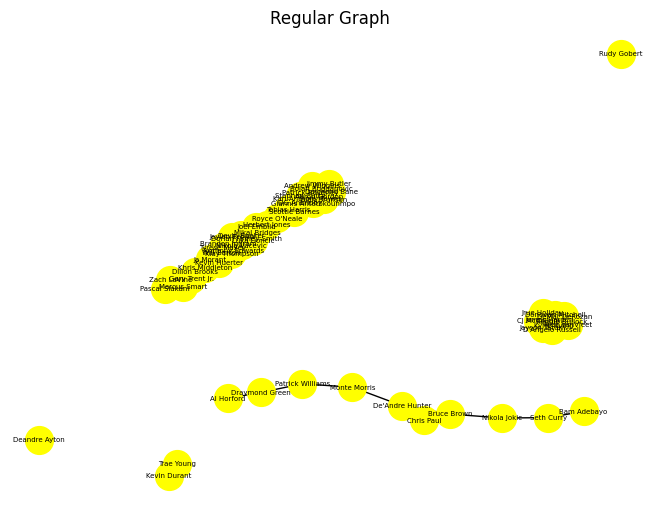

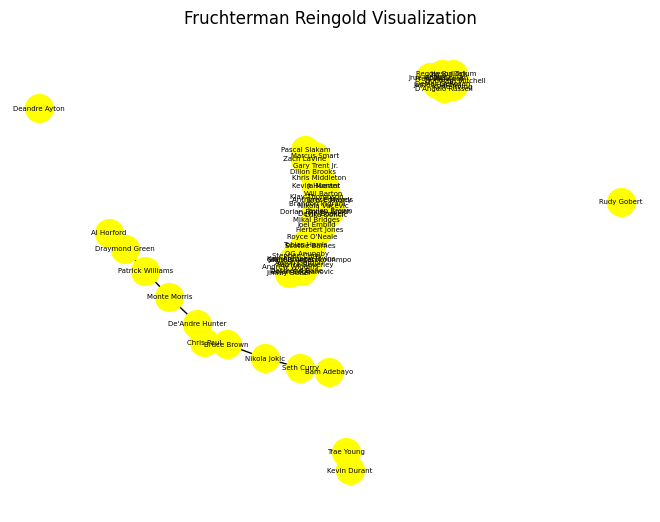

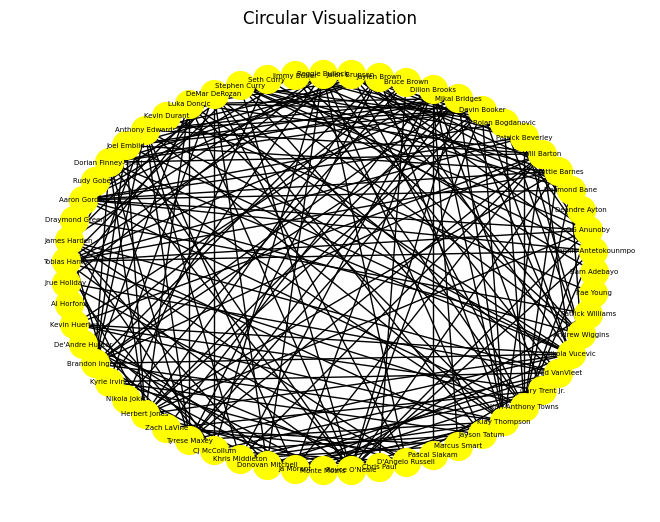

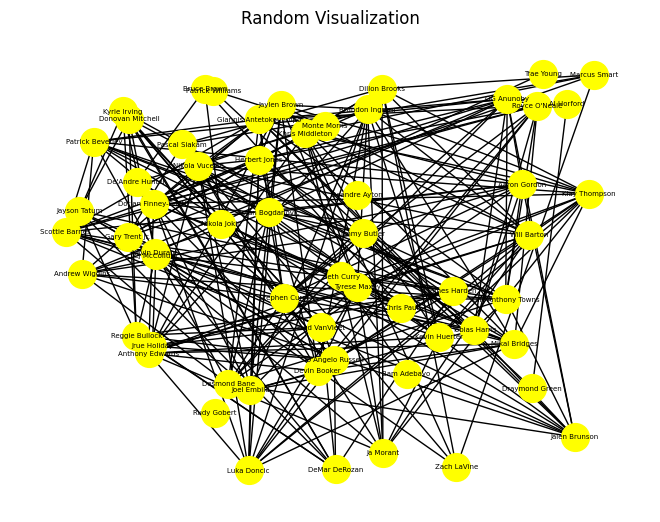

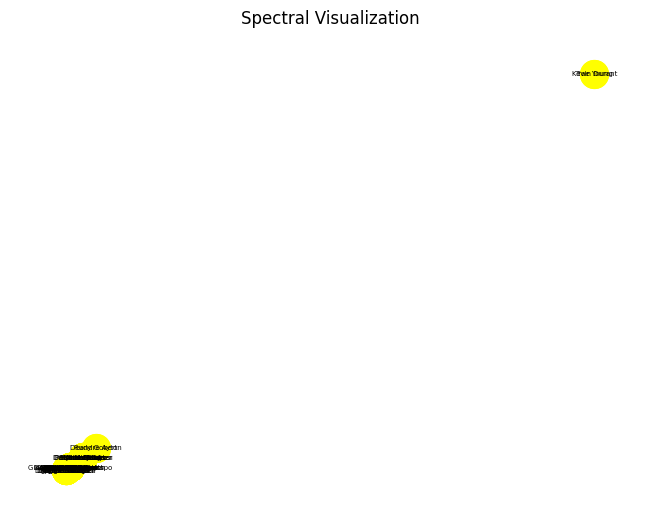

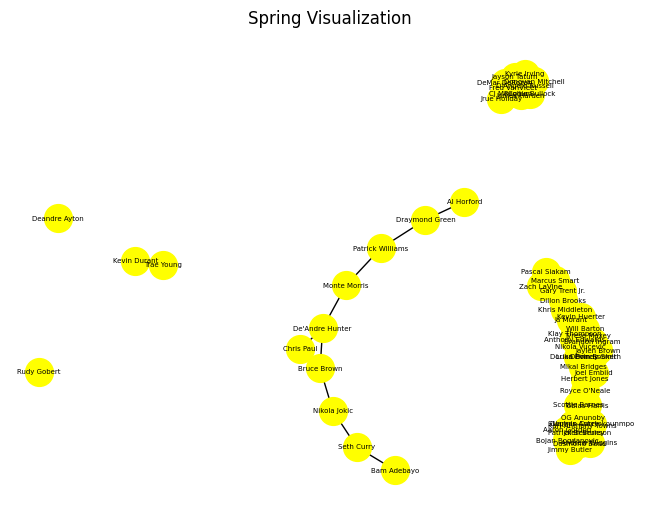

Top 5 nodes for Degree centrality: ['Mikal Bridges', 'Klay Thompson', 'Nikola Vucevic', 'OG Anunoby', 'Will Barton']
Top 5 nodes for Closeness centrality: ['Mikal Bridges', 'Devin Booker', 'Luka Doncic', 'Dorian Finney-Smith', 'Herbert Jones']
Top 5 nodes for betweeness centrality: ['Mikal Bridges', "Royce O'Neale", 'Klay Thompson', 'Scottie Barnes', 'Tobias Harris']
Top 5 nodes for eigenvector centrality: ['Nikola Vucevic', 'Mikal Bridges', 'Devin Booker', 'Luka Doncic', 'Dorian Finney-Smith']
Top 5 nodes for centralities katz centrality: ['Mikal Bridges', 'Nikola Vucevic', 'Klay Thompson', 'Devin Booker', 'Luka Doncic']


In [ ]:
# Print number of nodes and edges in the graph
print("# Nodes:", G.number_of_nodes())
print("# Edges:", G.number_of_edges())

# Count the number of connected components in the graph
print("# Connected Components:", nx.number_connected_components(G))

# Calculate the clustering coefficients for each node in the graph
clusters = nx.clustering(G)

# Get the top 5 nodes with the highest clustering coefficients
highest = sorted(clusters.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 clustering coefficients:", highest)

# Find the connected components in the graph
total_connected_components = nx.connected_components(G)

# Calculate the diameter of each connected component and store them in a list
diameter = []
for component in total_connected_components:
    subgraph = G.subgraph(component)
    diameter_curr = nx.diameter(subgraph)
    diameter.append(diameter_curr)

# Find the maximum diameter among the connected components
max_diameter = max(diameter)
print("Max Diameter of a Component in Graph:", max_diameter)

# Draw the graph with node labels using the default layout
nx.draw(G, with_labels=True, node_size=400, font_weight='normal', font_size=5, node_color='yellow')
plt.title("Regular Graph")
plt.show()

# Draw the graph with node labels using the Fruchterman-Reingold layout
nx.draw(G, with_labels=True, node_size=400, node_color="yellow", font_size=5, pos=nx.fruchterman_reingold_layout(G))
plt.title("Fruchterman Reingold Visualization")
plt.show()

# Draw the graph with node labels using the circular layout
nx.draw(G, with_labels=True, node_size=400, node_color="yellow", font_size=5, pos=nx.circular_layout(G))
plt.title("Circular Visualization")
plt.show()

# Draw the graph with node labels using the random layout
nx.draw(G, with_labels=True, node_size=400, node_color="yellow", font_size=5, pos=nx.random_layout(G))
plt.title("Random Visualization")
plt.show()

# Draw the graph with node labels using the spectral layout
nx.draw(G, with_labels=True, node_size=400, node_color="yellow", font_size=5, pos=nx.spectral_layout(G))
plt.title("Spectral Visualization")
plt.show()

# Draw the graph with node labels using the spring layout
nx.draw(G, with_labels=True, node_size=400, node_color="yellow", font_size=5, pos=nx.spring_layout(G))
plt.title("Spring Visualization")
plt.show()




# Calculate and print the top 5 nodes based on degree centrality
highest = sorted(nx.degree_centrality(G), key=nx.degree_centrality(G).get, reverse=True)[:5]
print("Top 5 nodes for Degree centrality:", highest)

# Calculate and print the top 5 nodes based on closeness centrality
highest = sorted(nx.closeness_centrality(G), key=nx.closeness_centrality(G).get, reverse=True)[:5]
print("Top 5 nodes for Closeness centrality:", highest)

# Calculate and print the top 5 nodes based on betweenness centrality
highest = sorted(nx.betweenness_centrality(G), key=nx.betweenness_centrality(G).get, reverse=True)[:5]
print("Top 5 nodes for betweeness centrality:", highest)

# Calculate and print the top 5 nodes based on eigenvector centrality
highest = sorted(nx.eigenvector_centrality(G), key=nx.eigenvector_centrality(G).get, reverse=True)[:5]
print("Top 5 nodes for eigenvector centrality:", highest)

# Calculate and print the top 5 nodes based on Katz centrality
katz = nx.katz_centrality(G, alpha=0.01)
highest = sorted(katz, key=katz.get, reverse=True)[:5]
print("Top 5 nodes for centralities katz centrality:", highest)

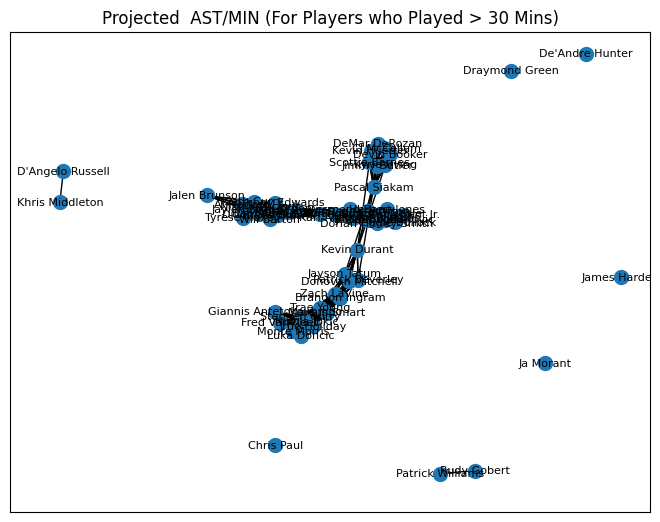

# Nodes: 59
# Edges: 165
# Connected Components: 7
Top 5 clustering coefficients: [('Giannis Antetokounmpo', 1.0), ('DeMar DeRozan', 1.0), ('Al Horford', 1.0), ('Gary Trent Jr.', 1.0), ('Devin Booker', 0.9333333333333333)]
Max Diameter of a Component in Graph (for players who played > 30 mins): 9


In [ ]:
#Graph 5: Projected graph of Player Assists/Minute - connecting players with similar assists/min
G.clear()

# Filter the dataframe to include players with more than 30 minutes played
df = df[df['MP'] > 30]

# Calculate assists per minute for each player
df['assists_per_min'] = df['AST'] / df['MP']

# Iterate over the rows of the filtered dataframe
for i, row in df.iterrows():
    player = row['Player']
    ppm = row['assists_per_min']
    G.add_node(player, color=ppm)

# Create edges between nodes if the absolute difference in color (assists_per_min) is less than 0.01
for u in G.nodes():
    for v in G.nodes():
        if u != v and abs(G.nodes[u]['color'] - G.nodes[v]['color']) < 0.01:
            G.add_edge(u, v)

# Create a projected graph based on the 'Player' attribute and the sum of 'assists_per_min'
projection = nx.projected_graph(G, df['Player'], lambda player: df.loc[df['Player'] == player, 'assists_per_min'].sum())

# Set the layout for the projected graph visualization
pos = nx.spring_layout(projection, k=0.15, iterations=20)

# Draw the projected graph with nodes, edges, and labels
nx.draw(projection, pos, with_labels=True, node_size=100, font_size=8)
plt.title('Projected  AST/MIN (For Players who Played > 30 Mins)')
plt.axis('on')
plt.show()

print("# Nodes:", G.number_of_nodes())
print("# Edges:", G.number_of_edges())
print("# Connected Components:", nx.number_connected_components(G))

# Calculate clustering coefficients for each node in the graph
clusters = nx.clustering(G)
highest = sorted(clusters.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 clustering coefficients:", highest)

# Find the connected components in the graph
total_connected_components = nx.connected_components(G)

# Calculate the diameter of each connected component
diameter = []
for component in total_connected_components:
    subgraph = G.subgraph(component)
    diameter_curr = nx.diameter(subgraph)
    diameter.append(diameter_curr)

# Find the maximum diameter among the connected components
max_diameter = max(diameter)
print("Max Diameter of a Component in Graph (for players who played > 30 mins):", max_diameter)


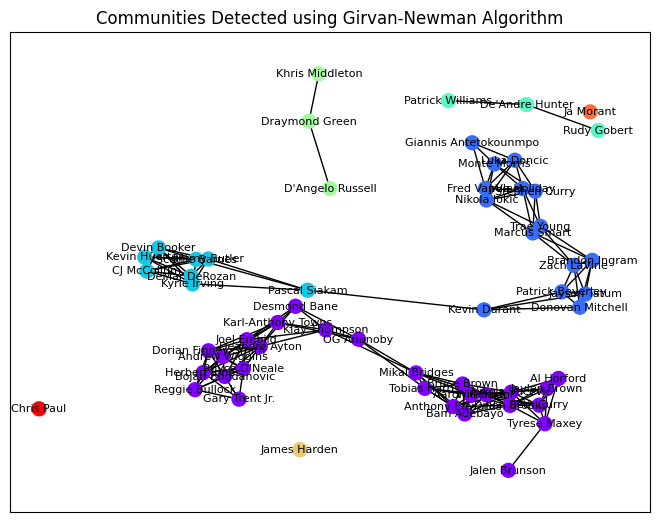

Modularity Score: 0.5675114784205694
Girvan Newman # of communities: 8


In [ ]:
#Community Detection via Girvan Newman Algorithm
# Run Girvan-Newman algorithm to detect communities in the graph G
comp = community.girvan_newman(G)

# Get the first set of communities from the Girvan-Newman algorithm
communities = next(comp)

# Assign a unique color to each community
community_colors = {}
for i, community in enumerate(communities):
    for player in community:
        community_colors[player] = i

# Assign colors to nodes based on their community membership
node_colors = [community_colors[node] for node in G.nodes()]

# Compute the layout for the graph visualization using a spring layout
pos = nx.spring_layout(G, k=0.15, iterations=20)

# Draw the graph with node labels, node sizes, font size, node colors, and colormap
nx.draw(G, pos, with_labels=True, node_size=100, font_size=8, node_color=node_colors, cmap='rainbow')
plt.title('Communities Detected using Girvan-Newman Algorithm')
plt.axis('on')
plt.show()

# Compute the modularity score of the detected communities & print number of communities found
modularity = nx_comm.modularity(G, communities)
print("Modularity Score:", modularity)

amt = 0
for com in communities:
  amt = amt + 1

print("Girvan Newman # of communities:", amt)

